# 1. 데이터 수집

In [17]:
#312-01 csv 파일 불러오기
import pandas as pd

data = pd.read_csv("./data/datasets/Part2/housing_data.csv", header = None, sep=',')
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
data.columns = col_names

In [4]:
# 312-02 head 함수
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7            1  
3     18.7  394.63   2.94  33.4            1  
4     18.7  396.90   5.33  36.2            1  


# 2. 데이터 전처리

In [9]:
# 321-01 shape 함수
print(data.shape)     # data 행과 열 확인

(526, 15)


In [8]:
# 321-02 info 함수
print(data.info())    # 결측치 확인, Data type 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB
None


In [10]:
# 321-03 describe 함수
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     3.613524   10.931559   11.306616    0.066540    0.555954    6.271076   
std      8.601545   22.977112    6.934739    0.249461    0.113854    0.698140   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.453000    5.879250   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.183500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.613500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    68.816540    3.742880    9.416350  410.547529   18.513308  357.888099   
std     27.868375    2.0836

In [11]:
# 322-01 결측치 개수 확인
print(data.isnull().sum())

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64


In [12]:
# 322-02 결측치 비율 확인
print(data.isnull().sum()/data.shape[0])

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


In [13]:
# 322-03 결측치 대체(중앙값)
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

In [18]:
# 322-04 결측치 제거
data = data.loc[data['CRIM'].notnull(), ]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<Axes: >

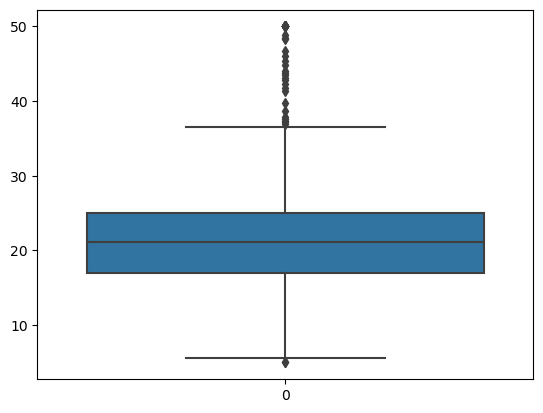

In [15]:
# 323-01 MEDV 변수 박스 플롯
import seaborn as sns
sns.boxplot(data['MEDV'])

In [23]:
# 323-02 IQR 값 기준 이상치
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print('outlier 범위 : %.2f 초과 또는 %.2f 미만' % (upper_bound, lower_bound))
print('outlier 개수 : %.0f' %len(data[(data['MEDV'] > upper_bound) | (data['MEDV'] < lower_bound)]))
print('outlier 비율 : %.2f' %(len(data[(data['MEDV'] > upper_bound) | (data['MEDV'] < lower_bound)])/len(data)))

outlier 범위 : 36.96 초과 또는 5.06 미만
outlier 개수 : 40
outlier 비율 : 0.08


In [24]:
# 323-03 IQR 값 기준 이상치 함수화
def get_outlier_prop(x):
    Q1, Q3 = x.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = x[(x > upper_bound) | (x < lower_bound)]

    return str(round(100*len(outliers)/len(x), 1)) + '%'

print(data.apply(get_outlier_prop))

CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.2%
LSTAT           1.4%
MEDV            7.9%
isHighValue     0.0%
dtype: object


In [27]:
# 323-04 이상치 제거 예시1
# IQR값 기준으로 MEDV 변수의 이상치를 제거

Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

data1 = data[(data['MEDV'] <= upper_bound) & (data['MEDV'] >= lower_bound)]
data1.shape

(466, 15)

In [28]:
# 323-05 이상치 제거 예시2
# MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV'] >= 45)]
data2.shape

(484, 15)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData

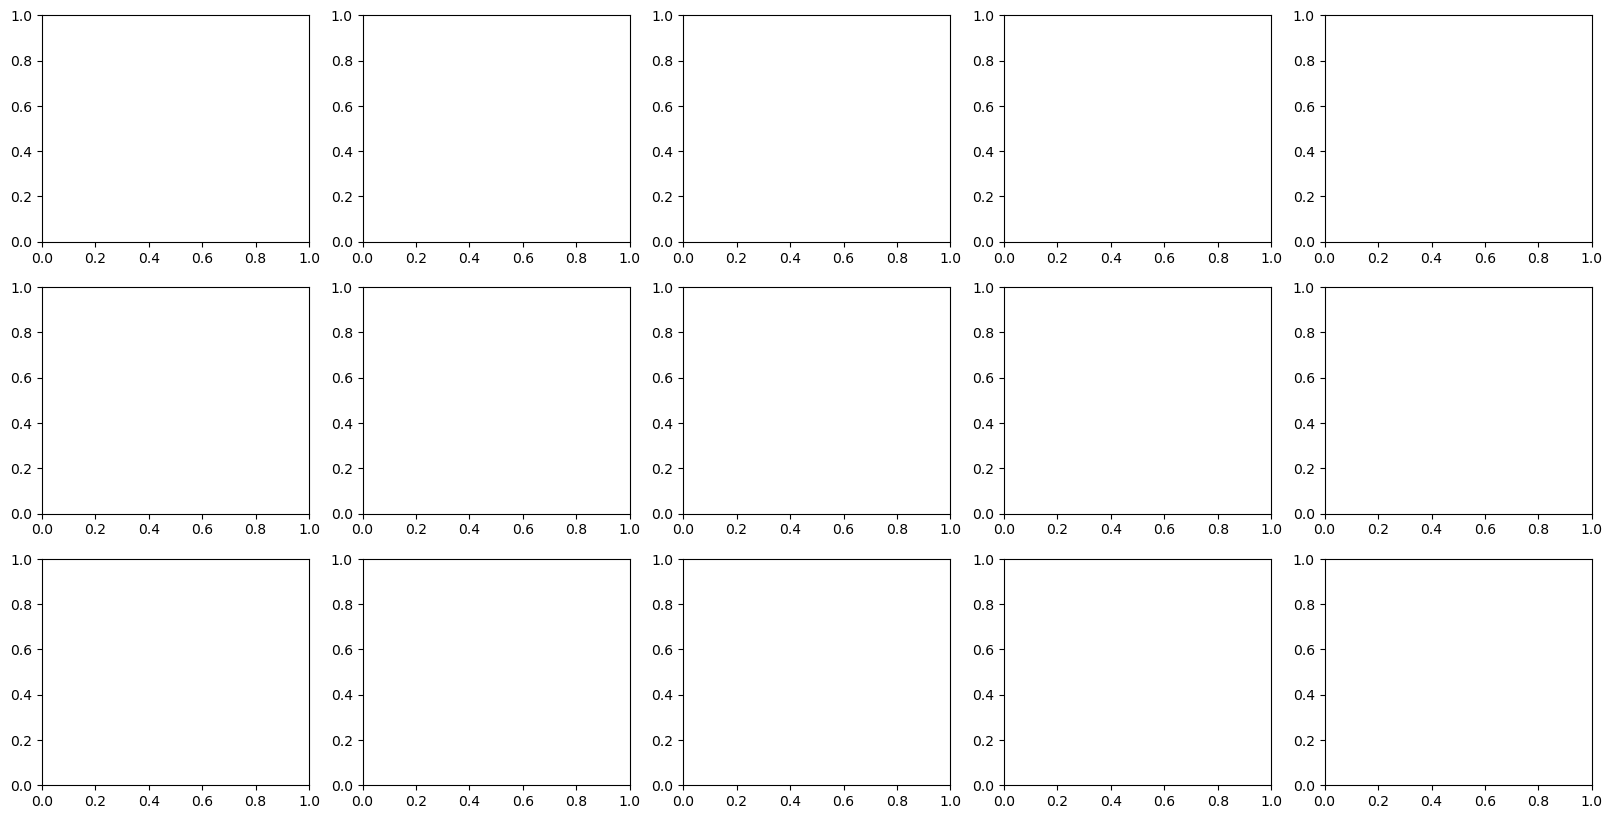

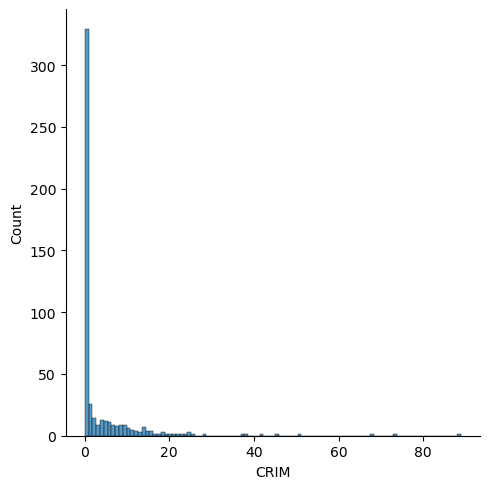

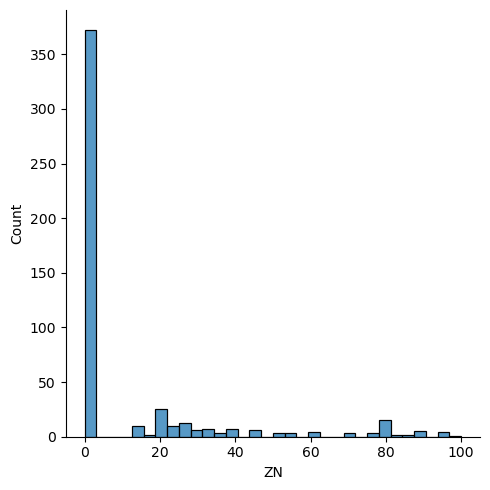

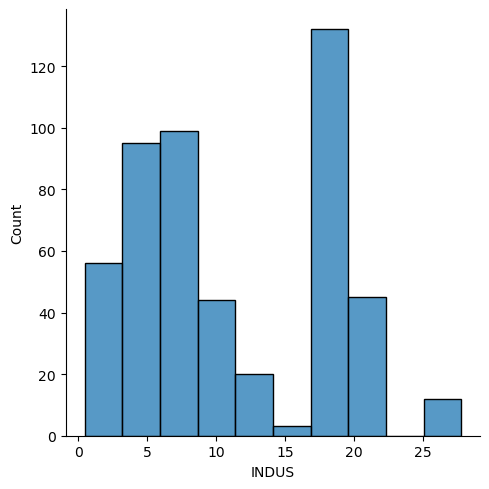

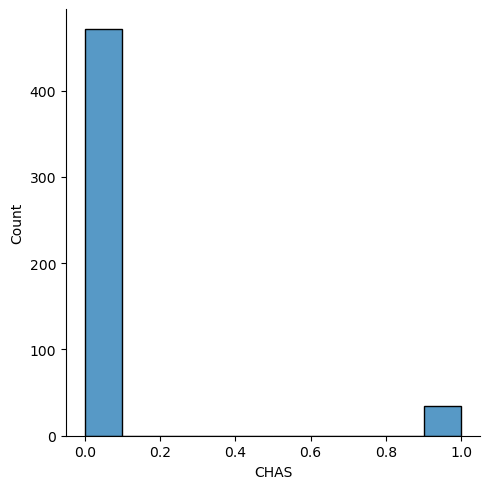

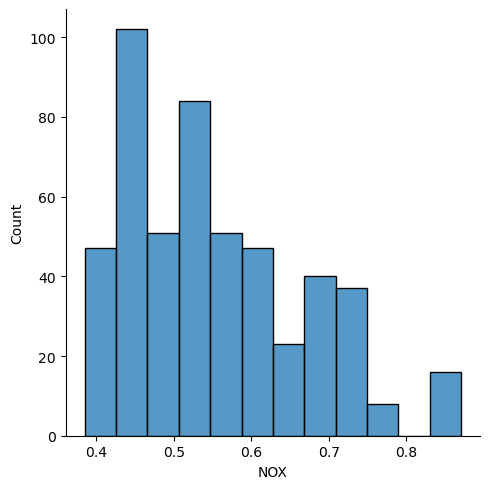

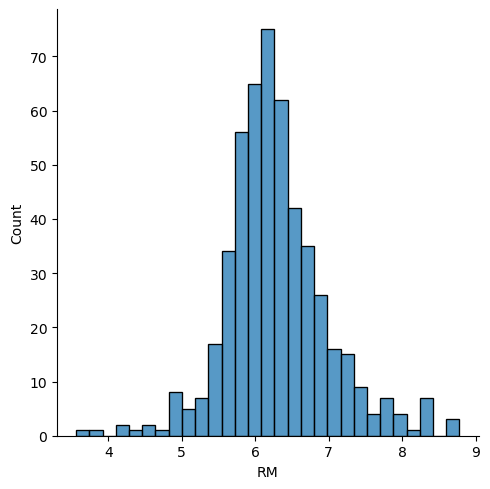

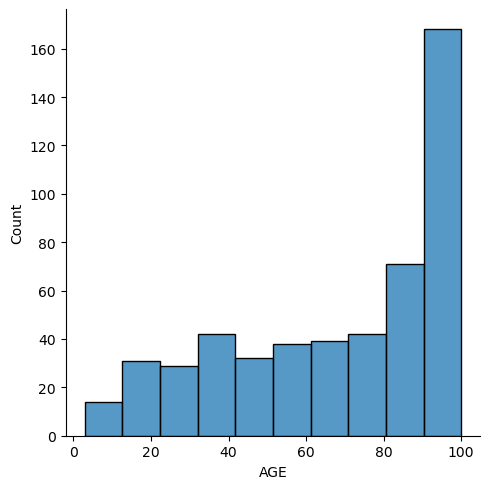

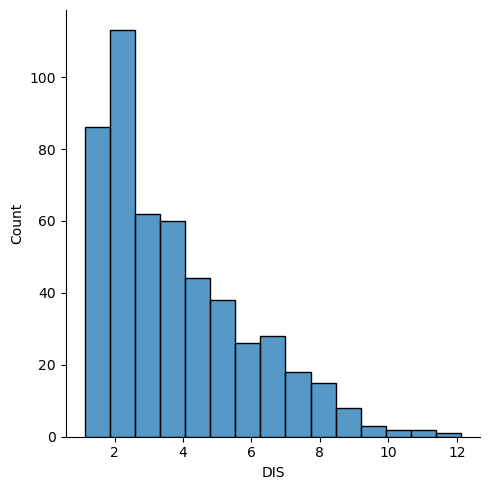

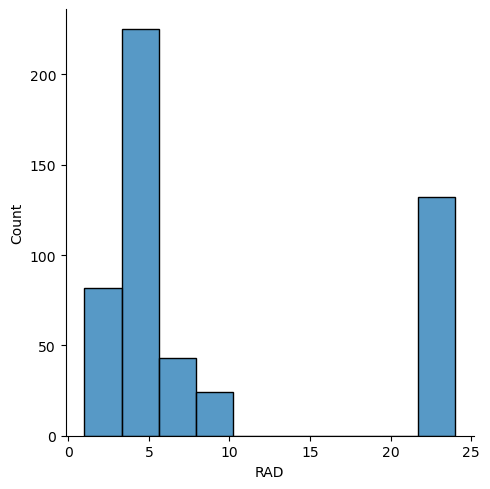

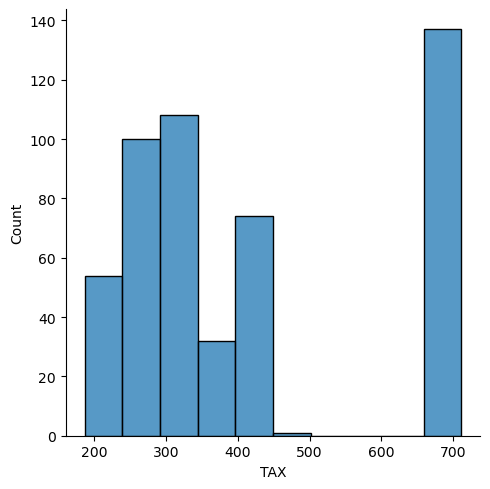

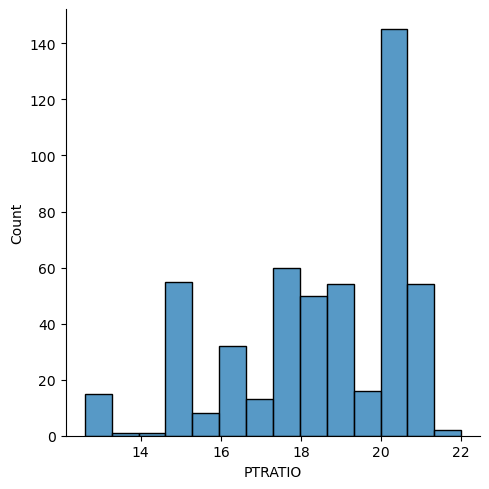

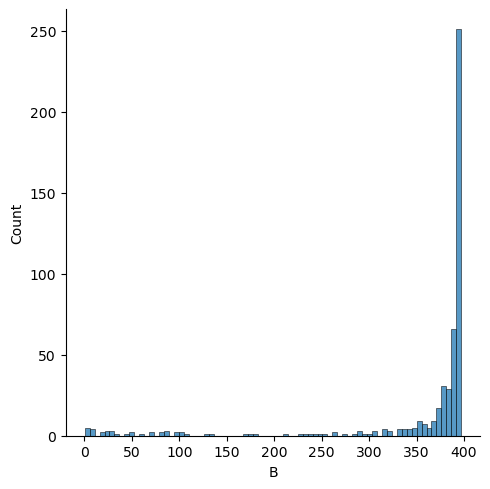

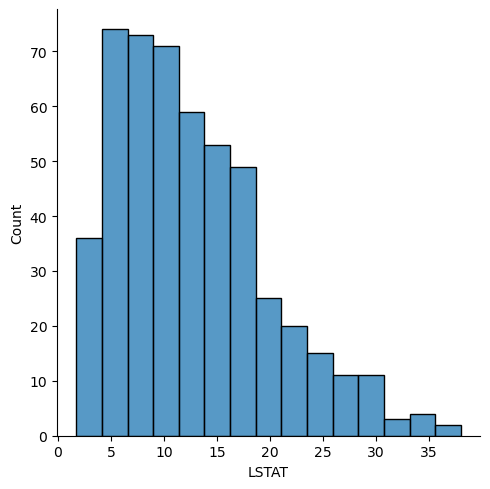

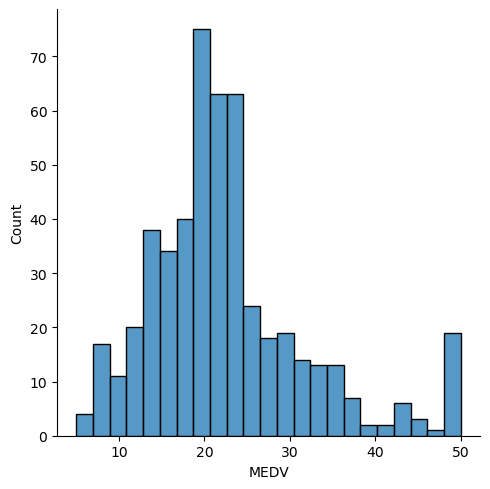

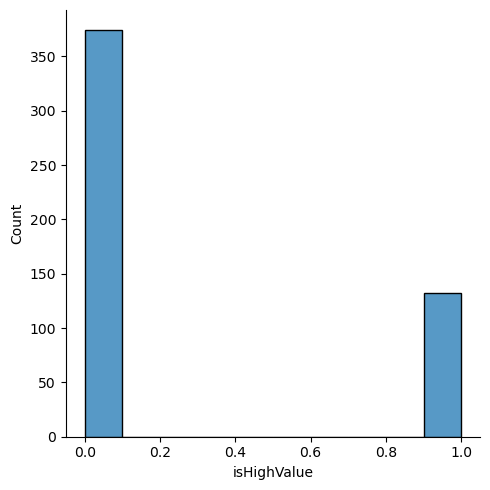

In [19]:
# 324-01 변수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns
#print(cols)

fig, axs = plt.subplots(ncols = 5, nrows =3, figsize = (20,10))
idx = 0
for _row in range(3): 
    for _col in range(5):
        if idx < len(cols):
            sns.displot(data[cols[idx]], ax = axs[_row][_col])
            idx += 1

plt.tight_layout()

In [8]:
# 324-02 변수 왜도 확인
print(data.apply(lambda x : x.skew(), axis = 0))

CRIM           5.223149
ZN             2.290540
INDUS          0.335891
CHAS           3.488440
NOX            0.707609
RM             0.430156
AGE           -0.616643
DIS            1.065567
RAD            1.035748
TAX            0.659300
PTRATIO       -0.848553
B             -2.956237
LSTAT          0.893318
MEDV           1.126802
isHighValue    1.152146
dtype: float64


In [9]:
# 324-03 로그 변환
import numpy as np
data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

1.2692005882725572


# 3. 회귀 모델링

In [20]:
# 331-01 데이터 생성
df_r = data.drop(['isHighValue'], axis=1)

In [21]:
# 331-02 변수 상관관계 확인
cols = ['MEDV', 'LSTAT', 'RM', 'CHAS', 'RAD', 'TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.737663  0.695360  0.175260 -0.381626 -0.468536
LSTAT -0.737663  1.000000 -0.613808 -0.053929  0.488676  0.543993
RM     0.695360 -0.613808  1.000000  0.091251 -0.209847 -0.292048
CHAS   0.175260 -0.053929  0.091251  1.000000 -0.007368 -0.035587
RAD   -0.381626  0.488676 -0.209847 -0.007368  1.000000  0.910228
TAX   -0.468536  0.543993 -0.292048 -0.035587  0.910228  1.000000


In [22]:
# 332-01 데이터 분할
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [23]:
# 332-02 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)   # 학습 데이터 기준으로 스케일링
X_test_r_scaled = scaler.transform(X_test_r)         # test 데이터는 학습 데이터의 스케일링을 동일하게 적용

In [24]:
# 332-03 선형 회귀 학습
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

In [26]:
# 332-04 coef_ 기울기
print(model_lr.coef_)

[-30.91718599 -11.91492733  -0.16534824   5.58044455  -2.67113508
  -0.32721382  -1.53630288]


In [27]:
# 332-05 intercept_ 절편
print(model_lr.intercept_)

37.167697089663605


In [28]:
# 332-06 SVM 학습
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

In [29]:
# 332-07 랜덤포레스트 학습
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state = 123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)

In [31]:
# 332-08 freture_importances_
for x, val in zip(X_cols, model_rfr.feature_importances_):
    print(f'{x} : %.3f' %val)

LSTAT : 0.718
PTRATIO : 0.070
TAX : 0.040
AGE : 0.038
NOX : 0.056
INDUS : 0.013
CRIM : 0.064


In [32]:
# 333-01 예측값 생성
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

In [43]:
# 333-02 평가 지표 계산
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('-'*30)
print('선형회귀결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_lr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_lr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_lr))
print('SVM결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_svr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_svr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_svr))
print('랜덤포레스트결과')
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_rfr))
print('MSE : %.3f' %mean_squared_error(y_test_r, y_pred_rfr))
print('MAPE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_rfr))

------------------------------
선형회귀결과
MAE : 4.324
MSE : 34.175
MAPE : 0.214
SVM결과
MAE : 3.851
MSE : 36.428
MAPE : 0.172
랜덤포레스트결과
MAE : 2.966
MSE : 17.946
MAPE : 0.147


# 4. 분류 모델링

In [44]:
# 341-01 데이터 생성
df_c = data.drop(['MEDV'], axis=1)

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

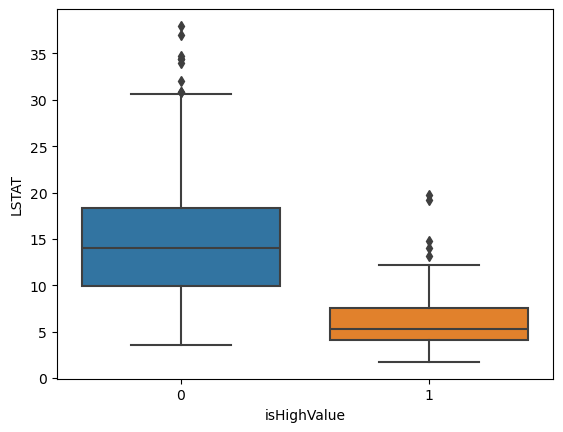

In [45]:
# 341-02 LSTAT 변수 박스 플롯
import seaborn as sns
sns.boxplot(x = 'isHighValue', y = 'LSTAT', data = df_c)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LSTAT', ylabel='Density'>

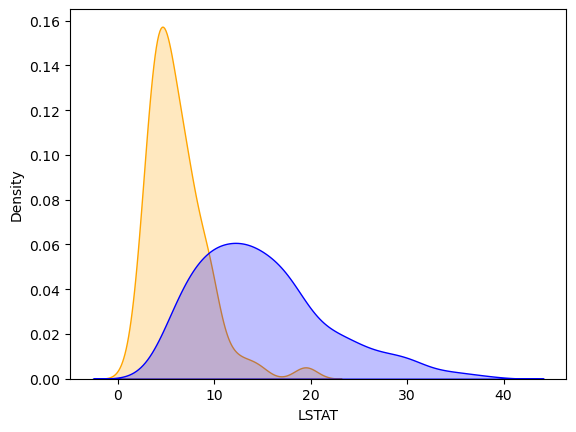

In [46]:
# 341-03 LSTAT 변수 kde 플롯
import seaborn as sns
sns.kdeplot(df_c.loc[df_c['isHighValue'] == 1, 'LSTAT'], color = 'orange', fill = True)
sns.kdeplot(df_c.loc[df_c['isHighValue'] == 0, 'LSTAT'], color = 'blue', fill = True)

In [48]:
# 341-04 isHighValue 값별 변수 평균
import numpy as np
print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue
0    67.124966
1    59.313979
dtype: float64


In [49]:
# 342-01 데이터 분할
from sklearn.model_selection import train_test_split
X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = data[X_cols].values
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size = 0.3, random_state = 123)
          

In [50]:
# 342-02 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

In [51]:
# 342-03 로지스틱 회귀 학습
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

In [52]:
# 342-04 coef_
print(model_lo.coef_)

[[-4.65645546 -2.24483024 -0.60721008  0.49751924 -0.21834367 -1.28672667
   0.10136627]]


In [53]:
# 342-05 intercept_
print(model_lo.intercept_)

[1.82922138]


In [54]:
# 342-06 SVM 학습
from sklearn.svm import SVC
model_svc = SVC(probability = True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

In [57]:
# 342-07 랜덤포레스트 학습
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier()

In [58]:
# 342-08 feature_importances_
for x, val in zip(X_cols, model_rfc.feature_importances_):
    print(f'{x} : %.3f' %val)

LSTAT : 0.397
PTRATIO : 0.097
TAX : 0.101
AGE : 0.086
NOX : 0.088
INDUS : 0.134
CRIM : 0.097


In [59]:
# 343-01 예측값 생성
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

In [64]:
#343-02 평가지표 계산
from sklearn.metrics import classification_report

print('로지스틱 회귀 결과')
print(classification_report(y_test_c, y_pred_lo, labels = [0, 1]))
print('SVM 결과')
print(classification_report(y_test_c, y_pred_svc, labels = [0, 1]))
print('랜덤포레스트 결과')
print(classification_report(y_test_c, y_pred_rfc, labels = [0, 1]))


로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.89      0.65      0.75        37

    accuracy                           0.89       152
   macro avg       0.89      0.81      0.84       152
weighted avg       0.89      0.89      0.89       152

SVM 결과
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       115
           1       0.82      0.73      0.77        37

    accuracy                           0.89       152
   macro avg       0.87      0.84      0.85       152
weighted avg       0.89      0.89      0.89       152

랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.89      0.84      0.86        37

    accuracy                           0.93       152
   macro avg       0.92      0.90      0.91       152
weighted avg       0.93      0.93      0.93   

In [67]:
# 343-03 AUROC 계산
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
print('로지스틱 회귀 결과 : %.3f' %roc_auc_score(y_test_c, y_pred_lo))
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
print('SVM : %.3f' %roc_auc_score(y_test_c, y_pred_svc))
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]
print('랜덤포레스트 결과 : %.3f' %roc_auc_score(y_test_c, y_pred_rfc))


로지스틱 회귀 결과 : 0.914
SVM : 0.941
랜덤포레스트 결과 : 0.967
